# Black Friday Sales Prediction 

### Problem Statement:

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Here is the definition of all the columns in the dataset

| Variable                       | Definition                                          |
| ------------------------------ | --------------------------------------------------- |
| User\_ID                       | User ID                                             |
| Product\_ID                    | Product ID                                          |
| Gender                         | Sex of User                                         |
| Age                            | Age in bins                                         |
| Occupation                     | Occupation (Masked)                                 |
| City\_Category                 | Category of the City (A,B,C)                        |
| Stay\_In\_Current\_City\_Years | Number of years stay in current city                |
| Marital\_Status                | Marital Status                                      |
| Product\_Category\_1           | Product Category (Masked)                           |
| Product\_Category\_2           | Product may belongs to other category also (Masked) |
| Product\_Category\_3           | Product may belongs to other category also (Masked) |
| Purchase                       | Purchase Amount (Target Variable)                   |

Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors

#### IMPOTING DATASETS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset

In [2]:
train_df= pd.read_csv('train_bf.csv')
test_df=pd.read_csv('test_bf.csv')

train_df['source']='train'
test_df['source']='test'

combine_df= train_df.append(test_df)

In [3]:
train_df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train


In [4]:
print(train_df.shape)
print(test_df.shape)

(550068, 13)
(233599, 12)


In [5]:
# Checking data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  source                      550068 non-null  object 
dtypes: float64(2),

#### Numerical variables: Product_Category_1, Product_Category_2  
#### categorical varibales: Gender, Occupation, city_category, marital status (encoded 0/1), Age, stay_in_current_city_years
#### Target variable: Purchase

In [6]:
train_df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [7]:
train_df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

### Checking for Null values

In [8]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
source                             0
dtype: int64

In [9]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
source                             0
dtype: int64

In [10]:
# EDA
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


There are missing values in Product_Category_2 and Product_Category_3- There is no need to deal with them 

Age: should be treated as a categorical column, encoding to be done

City_Category: convert this to a numerical column and should look at the frequency of each city category.

Gender: should be encoded too 

Product_Category_2 and Product_Category_3 have null values


In [11]:
# Numerical variable analysis- Univariate analysis

import seaborn as sns
sns.kdeplot

<function seaborn.distributions.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)>

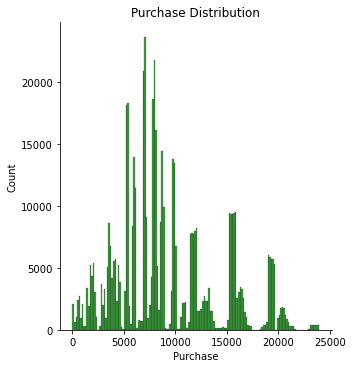

In [12]:
# Target variable purchase
import seaborn as sns
sns.displot(train_df["Purchase"],color='g')
plt.title("Purchase Distribution")
plt.show()

In [13]:
train_df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

## Univariate analysis

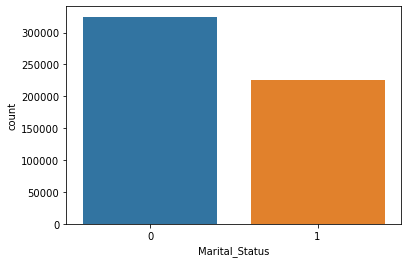

In [14]:
# Marital Status
ax=sns.countplot(x='Marital_Status', data=train_df)
# plt.show()

In [15]:
train_df['Marital_Status'].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

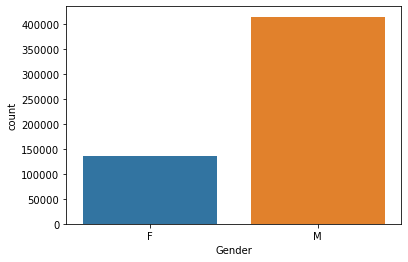

In [16]:
# Gender
sns.countplot(x='Gender', data=train_df)
plt.show()

In [17]:
train_df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

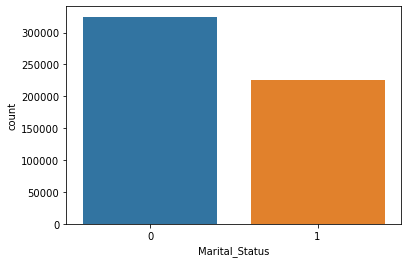

In [18]:
# Marital Status
ax=sns.countplot(x='Marital_Status', data=train_df)
# plt.show()

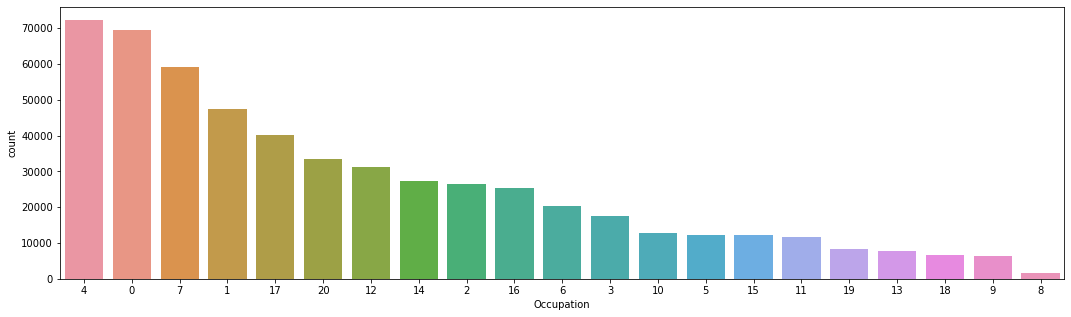

In [19]:
# Occupation 
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Occupation', data=train_df, order= train_df['Occupation'].value_counts().index)

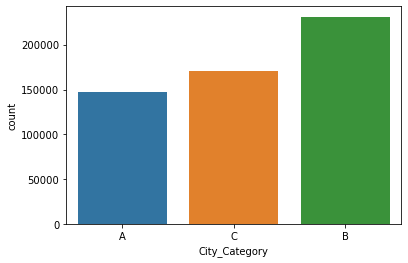

In [20]:
# City_Category

sns.countplot(x='City_Category', data=train_df)
plt.show()

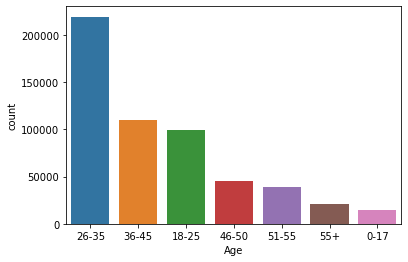

In [21]:
# Age

sns.countplot(x='Age', data=train_df, order= train_df['Age'].value_counts().index)
plt.show()

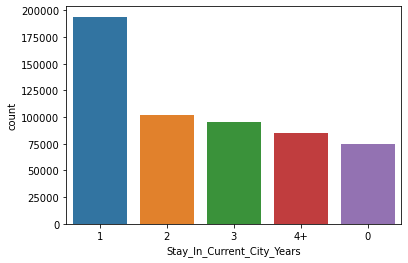

In [22]:
# Stay_In_Current_City_Years

sns.countplot(x='Stay_In_Current_City_Years', data=train_df, order= train_df['Stay_In_Current_City_Years'].value_counts().index)
plt.show()

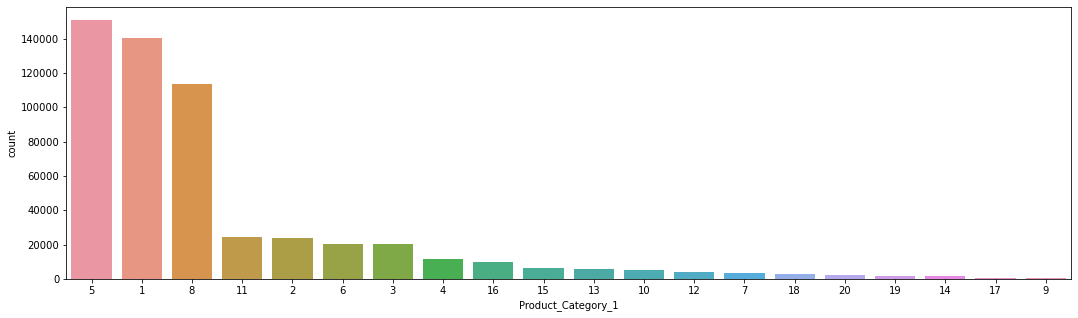

In [23]:
# Univariate analysis of Numeric variables

# Product_Category_1
plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_1', data=train_df, order= train_df['Product_Category_1'].value_counts().index)
plt.show()

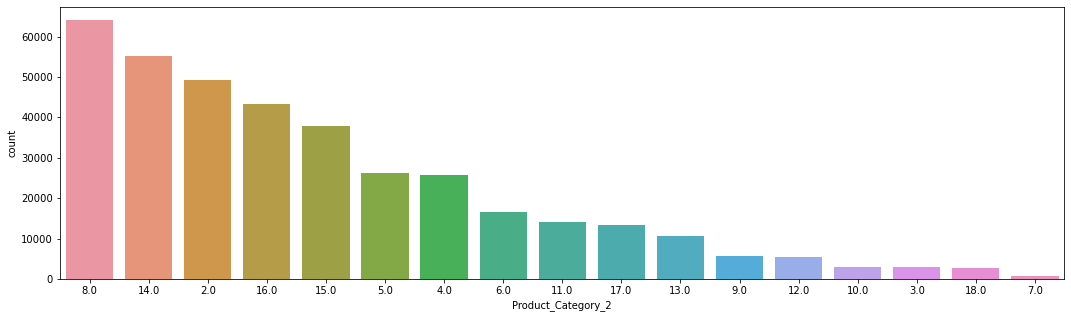

In [24]:
# Product_Category_2
plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_2', data=train_df, order= train_df['Product_Category_2'].value_counts().index)
plt.show()

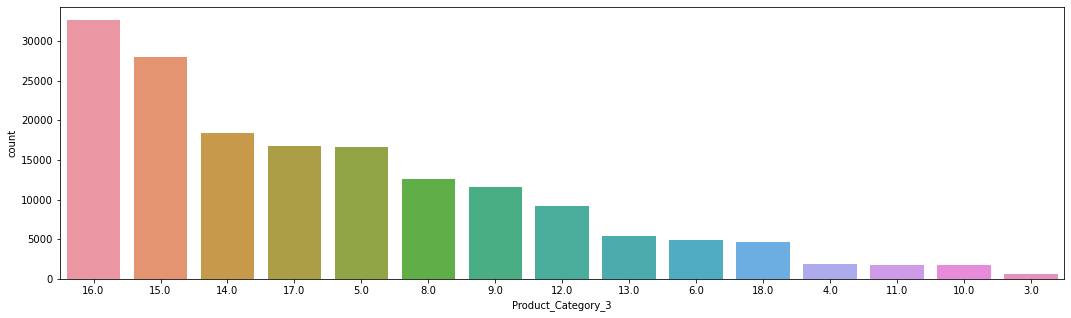

In [25]:
# Product_Category_3
plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_3', data=train_df, order= train_df['Product_Category_3'].value_counts().index)
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Age,Gender'>

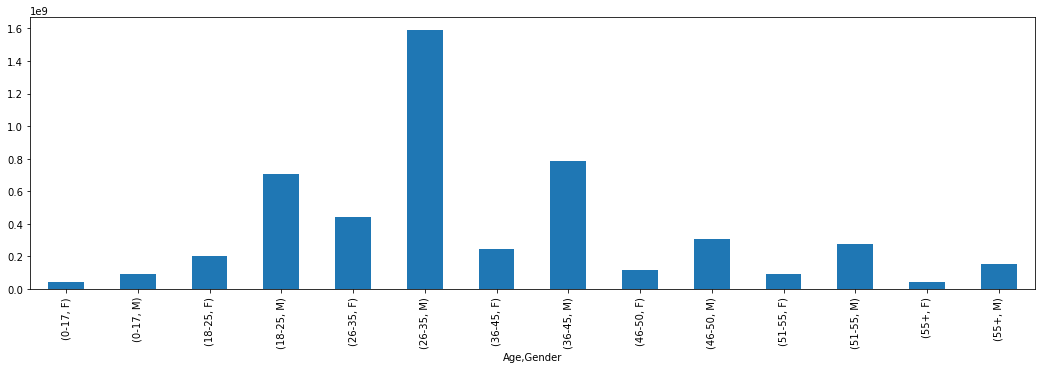

In [26]:
# Lets understand how the dependent variables function wrt the target variabel 'Purchase'
plt.figure(figsize=(18,5))
group_df = train_df.groupby(["Age", "Gender"])["Purchase"].sum()
group_df.plot(kind='bar')

<AxesSubplot:xlabel='Age,Gender'>

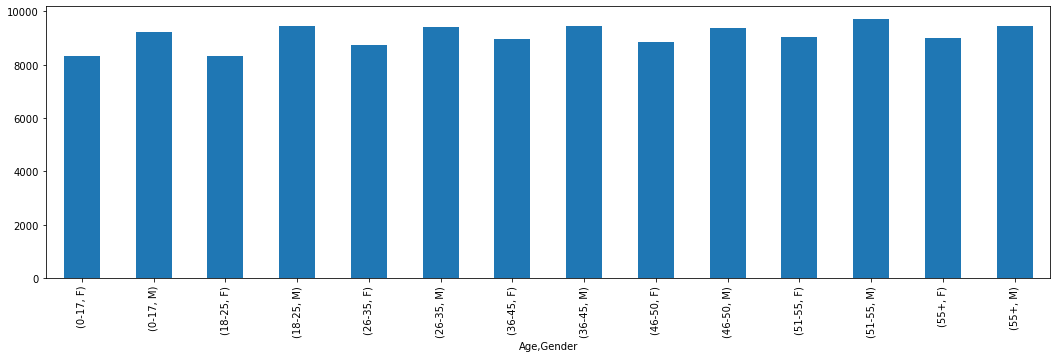

In [27]:
plt.figure(figsize=(18,5))
group_df = train_df.groupby(["Age", "Gender"])["Purchase"].mean()
group_df.plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

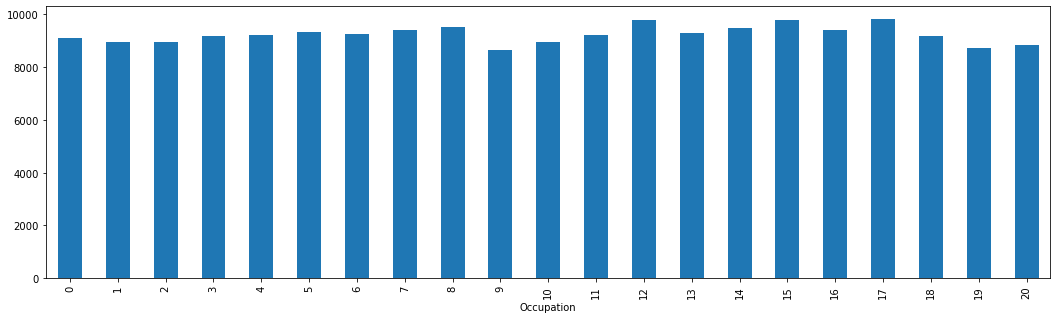

In [28]:
plt.figure(figsize=(18,5))
group_df = train_df.groupby(["Occupation"])["Purchase"].mean()
group_df.plot(kind='bar')

Most of the categorical variables are having a similar mean distribution of prices, this means there is not a single large affecting factor

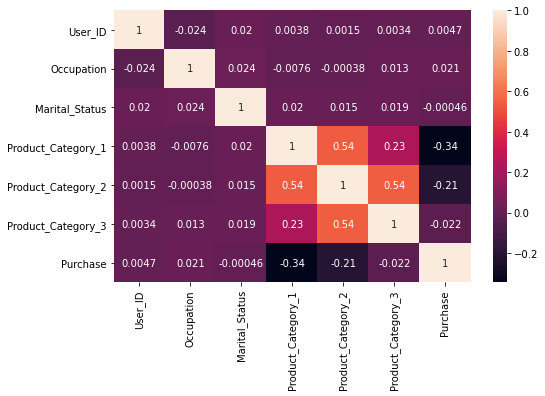

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

Product Categories have a decent correlation with respect to the Purchase variable, we can also conclude that Marrital Status is not playing any factor in the relationship

### Feature Engineering
The main aim of Feature Engineering is to analyse the data as much as possible which might involve creating additional features out of the existing
features which have a better correlation with the Target Variable. Helps in better model performance.

#### Fill the missing values

In [30]:
# Since the categories Product_Category_2, Product_Category_3 are sub categories when compared to the primary category Product_Category_1.
# We can fill them with null values

combine_df['Product_Category_2'].fillna(0, inplace=True)
combine_df['Product_Category_3'].fillna(0, inplace=True)

In [31]:
combine_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

train_df = combine_df[combine_df.source=='train']
test_df = combine_df[combine_df.source=='test']

In [33]:
train_df['City_Category'] = lr.fit_transform(train_df['City_Category'])
test_df['City_Category'] = lr.transform(test_df['City_Category'])

train_df['Stay_In_Current_City_Years'] = lr.fit_transform(train_df['Stay_In_Current_City_Years'])
test_df['Stay_In_Current_City_Years'] = lr.transform(test_df['Stay_In_Current_City_Years'])

combine_df = train_df.append(test_df)

<ipython-input-33-7110cde00eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['City_Category'] = lr.fit_transform(train_df['City_Category'])
<ipython-input-33-7110cde00eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['City_Category'] = lr.transform(test_df['City_Category'])
<ipython-input-33-7110cde00eb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

#### Why do we encode Categorical Variables ?

Categorical variables require special attention in regression analysis because, unlike dichotomous or continuous variables, they cannot by entered into the regression equation just as they are.  Instead, they need to be recoded into a series of variables which can then be entered into the regression model.

https://stats.oarc.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis/

#### Target Encoding

Target encoding involves replacing a categorical feature with average target value of all data points belonging to the category. Target encoding is a Baysian encoding technique.

Bayesian encoders use information from dependent/target variables to encode the categorical data.

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [34]:
import category_encoders as ce

def target_enc(train_df, test_df, features):
    targ_enc = ce.TargetEncoder(cols=features)
    targ_enc.fit(train_df[features], train_df['Purchase'])
    
    train_df = train_df.join(targ_enc.transform(train_df[features]).add_suffix('_targ'))
    test_df = test_df.join(targ_enc.transform(test_df[features]).add_suffix('_targ'))
    
    train_df = train_df.drop(features, axis=1)
    test_df = test_df.drop(features, axis=1)
    
    return train_df, test_df

features = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Gender', 'Age']
train_df_enc, test_df_enc = target_enc(train_df, test_df,features)

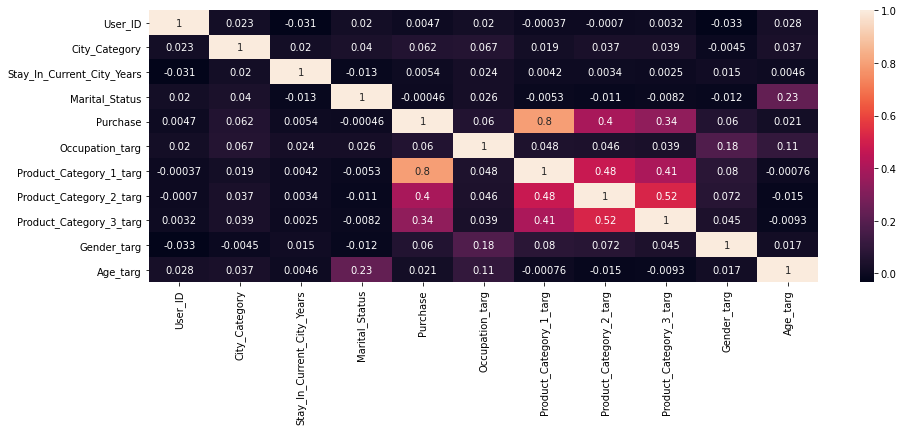

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(train_df_enc.corr(),annot=True)
plt.show()

In [36]:
combine_df= train_df_enc.append(test_df_enc)
combine_df.shape

(783667, 13)

In [37]:
# Since User_ID, Product_ID are identifiers.
# Marital_Status is very poorly correlated with respect to target

to_be_dropped=['Marital_Status']
combine_df = combine_df.drop(columns=to_be_dropped)

## Modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from math import sqrt

In [39]:
# Splitting train and test_df
train_df = combine_df[combine_df.source=='train']
test_df = combine_df[combine_df.source=='test']

# Removing the source column from test and train
train_df.drop(['source','User_ID', 'Product_ID'], axis=1, inplace=True)
test_df.drop(['Purchase', 'source'], axis=1, inplace=True)


# Splitting data into independent & dependent variables
X = train_df.drop("Purchase",axis=1)
y = train_df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
lr.intercept_

-10847.561067250137

In [42]:
lr.coef_

array([ 2.84295949e+02, -1.24574935e+00,  2.83006375e-01,  9.84945904e-01,
        2.96241247e-02,  3.80904994e-02, -1.17408804e-01,  9.21453531e-01])

In [43]:
y_pred = lr.predict(X_test)

###### Definition of the Metrics

- RMSE provides the Root Mean Square (difference) between the predicted & the actual values. 
- R-square is the proportion of variance of the response variable that can be explain by predictor variables.

In [45]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print("---------------------------------------------------------")
print("RMSE of the model: ",sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  2285.4982363448757
Mean Squared Error:  9086912.727525394
R2 Score:  0.6398543806665525
---------------------------------------------------------
RMSE of the model:  3014.4506510350097


In [46]:
train_df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### RandomForest Regression

In [47]:
RFregressor = RandomForestRegressor()  

In [48]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
y_pred = RFregressor.predict(X_test)

In [50]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print("---------------------------------------------------------")
print("RMSE of the model: ",sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2232.8452714973764
Mean Squared Error:  9351304.270162541
R2 Score:  0.6293756340641834
---------------------------------------------------------
RMSE of the model:  3057.9902338239312


### XGBoost Regressor

In [51]:
xgb = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_pred = xgb.predict(X_test)

In [53]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print("---------------------------------------------------------")
print("RMSE of the model: ",sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2149.8811954418993
Mean Squared Error:  8317788.544182613
R2 Score:  0.670337418598155
---------------------------------------------------------
RMSE of the model:  2884.0576527147673


### Calculating Purchase in unseen data

In [66]:
test_df_eval = test_df.drop(['User_ID', 'Product_ID'],axis=1)

final_pred = xgb.predict(test_df_eval)
final_df = test_df[['User_ID', 'Product_ID']]
final_df.insert(0, 'Purchase', final_pred)

final_df.to_csv('xgb_black_friday_sale.csv',index=False)

In [60]:
test_df_eval.shape

(233599, 8)

In [54]:
X_train.shape

(385047, 8)

## Conclusion and Future Perspecitves

XGBoost seems to have the lowest RMSE, higher R2 value and is doing good. More features can be created in order to improve the performance of the model